# Bagging
## Aim: To analyse the performance of SVM and decision tree classifier when we use Bagging
##  Objective:
### 1. To Remove outliers using Z score.
### 2. To Convert text columns to numbers using label encoding and one hot encoding
### 3.  Apply scaling
### 4. Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
### 5. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
### 6. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

### *Dataset: Heart Disease Prediction
### *Source: Kaggle

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data
data =pd.read_csv("heart (1).csv")
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
# Dimensions of data
data.shape

(918, 12)

In [ ]:
# Description of dataset
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Structure of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


* The dataset consists of 918 records with 12 columns. Of which 6 are numerical and 6 are categorical data. "Heart Disease" is the target variable and the dataset consists of no missing values

In [ ]:
# Count of Missing Values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Count of Duplicated Values
data.duplicated().sum()

0

**Detection and Removal of Outliers**

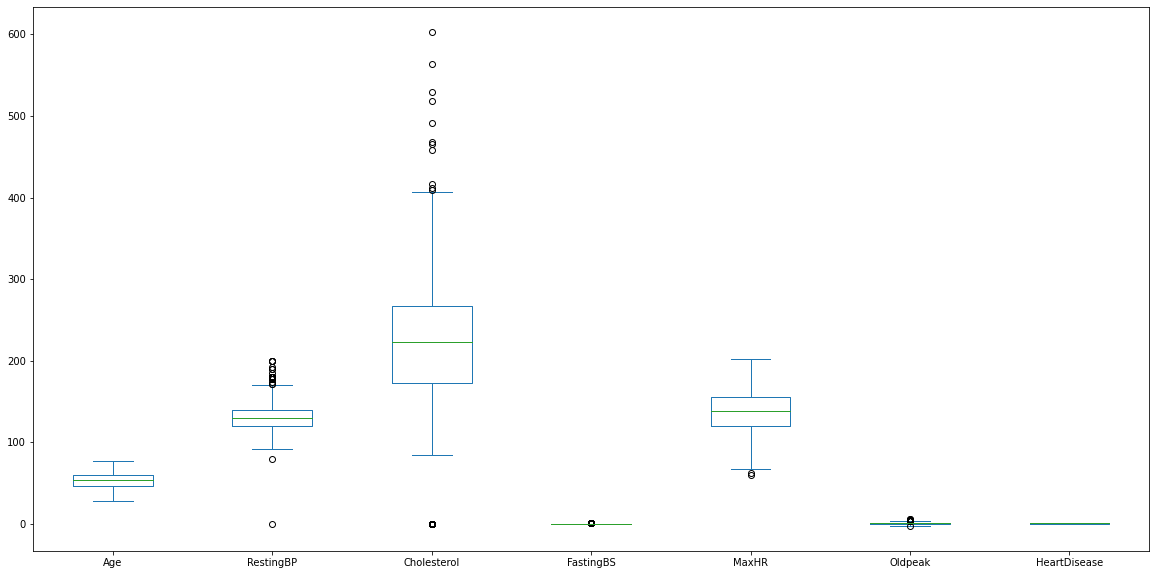

In [ ]:
# Box Plot to detect outliers in the data
data[["Age","RestingBP","Cholesterol", "FastingBS","MaxHR","Oldpeak","HeartDisease"]].plot(kind="box", figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness of RestingBP:  0.17954532149156327


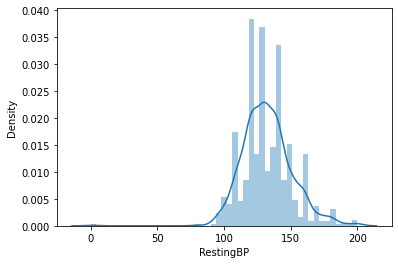

In [ ]:
# Probability Distribution of the Resting Blood Pressure.
sns.distplot(data["RestingBP"])
# The graph indicates that its a left skewed data

from scipy.stats import skew
print("Skewness of RestingBP: ",skew(data["RestingBP"]))

Skewness of Choleterol:  -0.6090891046626045


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


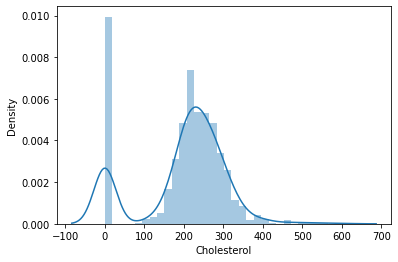

In [ ]:
# Probability Distribution of Cholesterol. The Graph obtained is Right skewed.
sns.distplot(data["Cholesterol"])

print("Skewness of Choleterol: ", skew(data["Cholesterol"]))

Since both the variables are skewed we use quantile methods to remove the outliers.

In [ ]:
P25 = data["RestingBP"].quantile(0.25)
P75 = data["RestingBP"].quantile(0.75)
print(P25,P75)

120.0 140.0


In [ ]:
upper = P75 + 1.5*(P75-P25)
lower = P25 - 1.5*(P75-P25)
print(upper,lower)

170.0 90.0


In [ ]:
# Data values greater than the upper limit
data[data["RestingBP"]>upper]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


In [ ]:
# Data Values lesser than lower limit
data[data["RestingBP"]<lower]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


As the number of outliers in Resting Blood Pressure is huge, instead of removing them, we have capped the outliers

In [ ]:
# Capping the outliers.
new_data = data.copy()
new_data["RestingBP"]=np.where(new_data["RestingBP"]>upper,upper,
                               np.where(new_data["RestingBP"]<lower,lower,
                                        new_data["RestingBP"]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

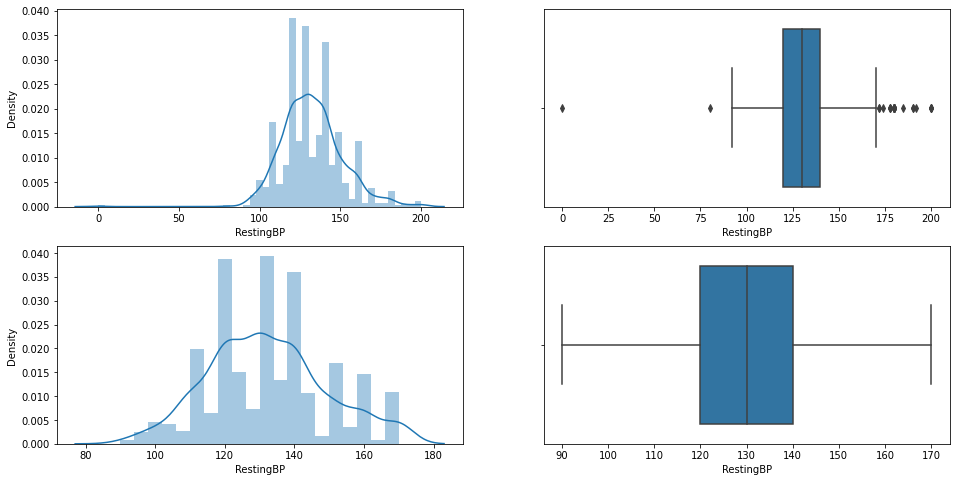

In [ ]:
# Comparing the plots before and after outlier detection
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["RestingBP"])
plt.subplot(2,2,2)
sns.boxplot(data["RestingBP"])
plt.subplot(2,2,3)
sns.distplot(new_data["RestingBP"])
plt.subplot(2,2,4)
sns.boxplot(new_data["RestingBP"])
plt.show()

Following the similar method for detection of outliers in Cholesterol

In [ ]:
P25 = new_data["Cholesterol"].quantile(0.25)
P75 = new_data["Cholesterol"].quantile(0.75)
print(P25,P75)

173.25 267.0


In [ ]:
upper = P75 + 1.5*(P75-P25)
lower = P25 - 1.5*(P75-P25)
print(upper,lower)

407.625 32.625


In [ ]:
new_data[new_data["Cholesterol"]>upper]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113.0,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145.0,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150.0,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118.0,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120.0,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130.0,603,1,Normal,125,Y,1.0,Flat,1
250,44,M,ASY,135.0,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132.0,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115.0,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140.0,417,1,LVH,157,N,0.8,Up,0


In [ ]:
new_data[new_data["Cholesterol"]<lower]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115.0,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95.0,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105.0,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145.0,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110.0,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122.0,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130.0,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102.0,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130.0,0,0,LVH,122,Y,1.0,Flat,1


In [ ]:
df = new_data.copy()
df["Cholesterol"]=np.where(df["Cholesterol"]>upper,upper,
                               np.where(df["Cholesterol"]<lower,lower,
                                        df["Cholesterol"]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

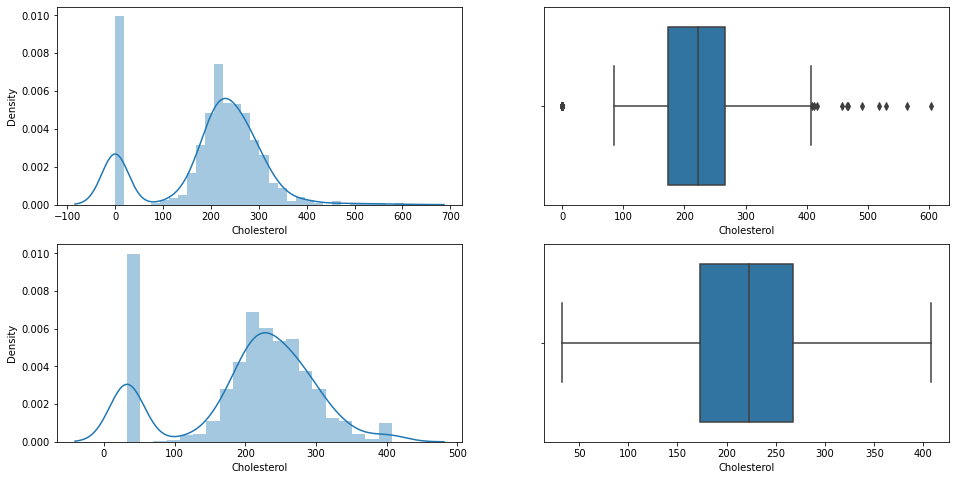

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_data["Cholesterol"])
plt.subplot(2,2,2)
sns.boxplot(new_data["Cholesterol"])
plt.subplot(2,2,3)
sns.distplot(df["Cholesterol"])
plt.subplot(2,2,4)
sns.boxplot(df["Cholesterol"])
plt.show()

Count of  Attributes in each columns

In [ ]:
print(df['ChestPainType'].value_counts())
print(df["RestingECG"].value_counts())
print(df["ExerciseAngina"].value_counts())
print(df["ST_Slope"].value_counts())

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


**Label Encoding**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["ChestPainType"]=label_encoder.fit_transform(df["ChestPainType"])
df["RestingECG"] = label_encoder.fit_transform(df["RestingECG"])
df["ExerciseAngina"]=label_encoder.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]=label_encoder.fit_transform(df["ST_Slope"])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,2,0


**One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = ["Sex", "RestingECG","ChestPainType","ExerciseAngina","ST_Slope"]
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(df[col].unique())]

onehotencoder = OneHotEncoder(sparse=False,handle_unknown="ignore")
encoded_cols = onehotencoder.fit_transform(df[cat_cols])
df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
df_ohe = df.join(df_enc)

df_ohe


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,R_0,C_1,C_2,C_0,C_3,E_0,E_1,S_2,S_1,S_0
0,40,1,1,140.0,289.0,0,1,172,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,1,130.0,283.0,0,2,98,0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,48,0,0,138.0,214.0,0,1,108,1,1.5,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,1,2,150.0,195.0,0,1,122,0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110.0,264.0,0,1,132,0,1.2,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,68,1,0,144.0,193.0,1,1,141,0,3.4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,1,0,130.0,131.0,0,1,115,1,1.2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,0,1,130.0,236.0,0,0,174,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_ohe[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]] = min_max_scaler.fit_transform(df_ohe[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]])
df_ohe


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,R_0,C_1,C_2,C_0,C_3,E_0,E_1,S_2,S_1,S_0
0,0.244898,1,1,0.625,0.683667,0.0,1,0.788732,0,0.295455,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0,2,0.875,0.393000,0.0,1,0.676056,0,0.409091,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,1,1,0.500,0.667667,0.0,2,0.267606,0,0.295455,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0,0,0.600,0.483667,0.0,1,0.338028,1,0.465909,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,1,2,0.750,0.433000,0.0,1,0.436620,0,0.295455,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.250,0.617000,0.0,1,0.507042,0,0.431818,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,1,0,0.675,0.427667,1.0,1,0.570423,0,0.681818,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,1,0,0.500,0.262333,0.0,1,0.387324,1,0.431818,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0,1,0.500,0.542333,0.0,0,0.802817,0,0.295455,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_ohe =df_ohe.drop(["Sex"], axis=1)
df_ohe =df_ohe.drop(["RestingECG"], axis=1)
df_ohe =df_ohe.drop(["ChestPainType"], axis=1)
df_ohe =df_ohe.drop(["ExerciseAngina"], axis=1)
df_ohe =df_ohe.drop(["ST_Slope"], axis=1)


In [ ]:
df_ohe

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,S_1,S_0,R_1,...,R_0,C_1,C_2,C_0,C_3,E_0,E_1,S_2,S_1,S_0
0,0.244898,0.625,0.683667,0.0,0.788732,0.295455,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.875,0.393000,0.0,0.676056,0.409091,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.500,0.667667,0.0,0.267606,0.295455,0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.600,0.483667,0.0,0.338028,0.465909,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.750,0.433000,0.0,0.436620,0.295455,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250,0.617000,0.0,0.507042,0.431818,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.675,0.427667,1.0,0.570423,0.681818,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.500,0.262333,0.0,0.387324,0.431818,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.500,0.542333,0.0,0.802817,0.295455,1,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
last_column = df_ohe.pop("HeartDisease")
df_ohe.insert(20, "HeartDisease",last_column)
df_ohe

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,S_1,S_0,R_1,R_2,...,C_1,C_2,C_0,C_3,E_0,E_1,S_2,S_1,S_0,HeartDisease
0,0.244898,0.625,0.683667,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.428571,0.875,0.393000,0.0,0.676056,0.409091,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.183673,0.500,0.667667,0.0,0.267606,0.295455,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.408163,0.600,0.483667,0.0,0.338028,0.465909,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.530612,0.750,0.433000,0.0,0.436620,0.295455,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250,0.617000,0.0,0.507042,0.431818,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
914,0.816327,0.675,0.427667,1.0,0.570423,0.681818,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
915,0.591837,0.500,0.262333,0.0,0.387324,0.431818,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
916,0.591837,0.500,0.542333,0.0,0.802817,0.295455,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


Fitting the Models

In [ ]:
# Assigning the Independent and Target Variables
x =df_ohe.iloc[:,:-1]
y = df_ohe["HeartDisease"]


In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)


**Classification Model using SVM**

In [ ]:
from sklearn import svm
classifier =svm.SVC()
classifier.fit(x_train,y_train)
pred =classifier.predict(x_test)
print(pred[:5])

[1 1 1 1 0]


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred=pred))


              precision    recall  f1-score   support

           0       0.83      0.76      0.79       113
           1       0.84      0.89      0.87       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



Out of all non heart disease classes that have been predicted correctly by the model, 83% of  them were actually true.  Out of total positive classes of non heart disease,our model was able to predict all the non heart diseases classes correctly with 76% accuracy. The model is able to classify the Non heart disease class with an accuracy of 79%.


But the heart disease class that have been predicted correctly by the model, 84% of them were actually True. Out of The total of heart diseased, our model was able to predict the heart disease classes with only 89% accuaracy. The F1-Score is pretty good, The model is able to classify the heart diseases class very well.
The model is able to classify the two classes with an accuracy of 84%


* Optimal Values for SVM

In [ ]:

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', "linear", "poly","sigmoid"]}
grid_search_dt = GridSearchCV(estimator = classifier,param_grid = param_grid,scoring = 'accuracy',cv = 10,n_jobs = -1)
grid_search_dt.fit(x_train,y_train)

svm2 = svm.SVC()

clf =GridSearchCV(svm2,param_grid)

best_model = clf.fit(x, y)
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('OptimalGamma:', best_model.best_estimator_.get_params()['gamma'])
print('Kernal:', best_model.best_estimator_.get_params()['kernel'])


Best C: 0.1
OptimalGamma: 0.01
Kernal: rbf


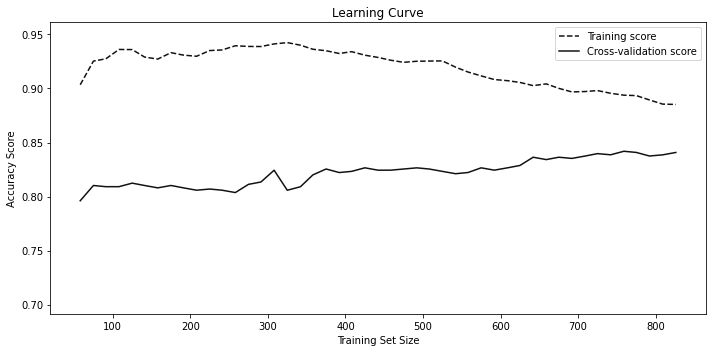

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(classifier, x, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#FFFFFF")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#FFFFFF")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Initially, when the training sample size is 50, both the train score and CV Score had good accuracy. But as the sample size increased the accuracy decreased. Up-to a sample size of 500, the accuracy of the model was high.

Bagging Model for SVM

In [ ]:
from sklearn.ensemble import BaggingClassifier
svm1 = svm.SVC(C=0.1, gamma=0.01, kernel="rbf")
model = BaggingClassifier(base_estimator=svm1)
model.fit(x_train,y_train)
predictor =model.predict(x_test)
print(predictor[:5])

[1 1 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(y_test, predictor))

Accuracy Score:  0.8188405797101449


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


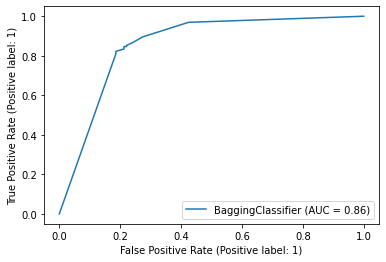

In [ ]:
plot_roc_curve(model, x_test,y_test)

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state =42)
clf_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters_dt = [ {'criterion':['gini','entropy'],'splitter': ["best","random"], "max_depth": list(range(1,10)), "min_samples_split": [2]  }]
grid_search_dt = GridSearchCV(estimator = clf_model,param_grid = parameters_dt,scoring = 'accuracy',cv = 10,n_jobs = -1)
grid_search_dt.fit(x_train,y_train)

dt_2 = DecisionTreeClassifier()

clf =GridSearchCV(dt_2,parameters_dt)

best_model = clf.fit(x, y)
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best splitter:', best_model.best_estimator_.get_params()['splitter'])
print('Optimal Depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Min Splits:', best_model.best_estimator_.get_params()['min_samples_split'])

Best Criterion: entropy
Best splitter: random
Optimal Depth: 4
Min Splits: 2


Accuracy 0.8405797101449275


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


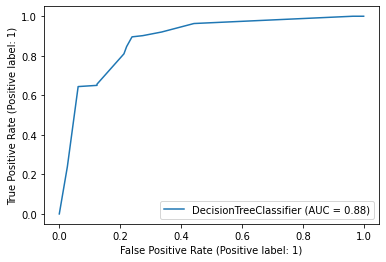

In [ ]:
from sklearn.metrics import plot_roc_curve
clf_model2 = DecisionTreeClassifier(criterion="entropy",splitter="random", max_depth=4, random_state =42)
clf_model2.fit(x_train,y_train)
y_pred2 =clf_model2.predict(x_test)
Accuracy2 = metrics.accuracy_score(y_test,y_pred2)
print("Accuracy", Accuracy2)
plot_roc_curve(clf_model2, x_test,y_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       113
           1       0.84      0.90      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



* When used the Decision Tree Classifier:
Out of all non heart diseased classes that have been predicted correctly by the model, 83% of  them were actually true.  Out of total positive classes of non heart diseased patients,our model was able to predict the non heart diseases classes correctly with 74% accuracy. The model is able to classify the Non heart disease class with an accuracy of 80%.

The heart disease class that have been predicted correctly by the model, 84% of them were actually True. Out of The total of heart disease class, our model was able to predict the heart disease classes with 90% accuaracy. The F1-Score is high, The model is able to classify the heart diseases class very well.
The model is able to classify the two classes with an accuracy of 84%

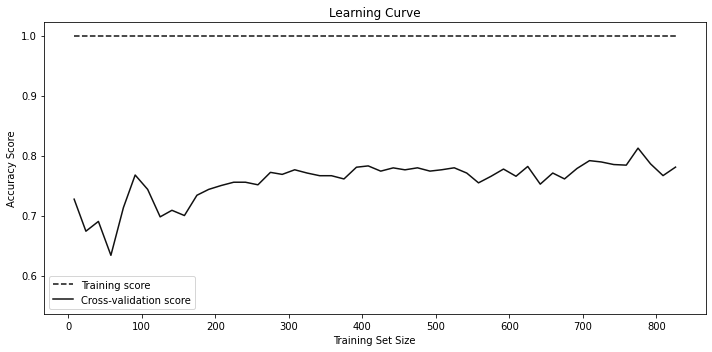

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf_model, x, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#FFFFFF")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#FFFFFF")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

The Learning curve for Training set remained the same,irrespective of the sample size. The Cross validation Score gave the highest accuracy for sample size=100

[Text(0.5267857142857143, 0.9, 'X[19] <= 0.5\ngini = 0.497\nsamples = 642\nvalue = [297, 345]'),
 Text(0.2857142857142857, 0.7, 'X[4] <= 0.641\ngini = 0.284\nsamples = 362\nvalue = [62, 300]'),
 Text(0.14285714285714285, 0.5, 'X[7] <= 0.5\ngini = 0.199\nsamples = 304\nvalue = [34, 270]'),
 Text(0.07142857142857142, 0.3, 'X[16] <= 0.5\ngini = 0.439\nsamples = 40\nvalue = [13, 27]'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'X[1] <= 0.013\ngini = 0.146\nsamples = 264\nvalue = [21, 243]'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'X[11] <= 0.5\ngini = 0.499\nsamples = 58\nvalue = [28, 30]'),
 Text(0.35714285714285715, 0.3, 'X[1] <= 0.588\ngini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.3, 'X[4] <= 0.651\ngini = 0.3

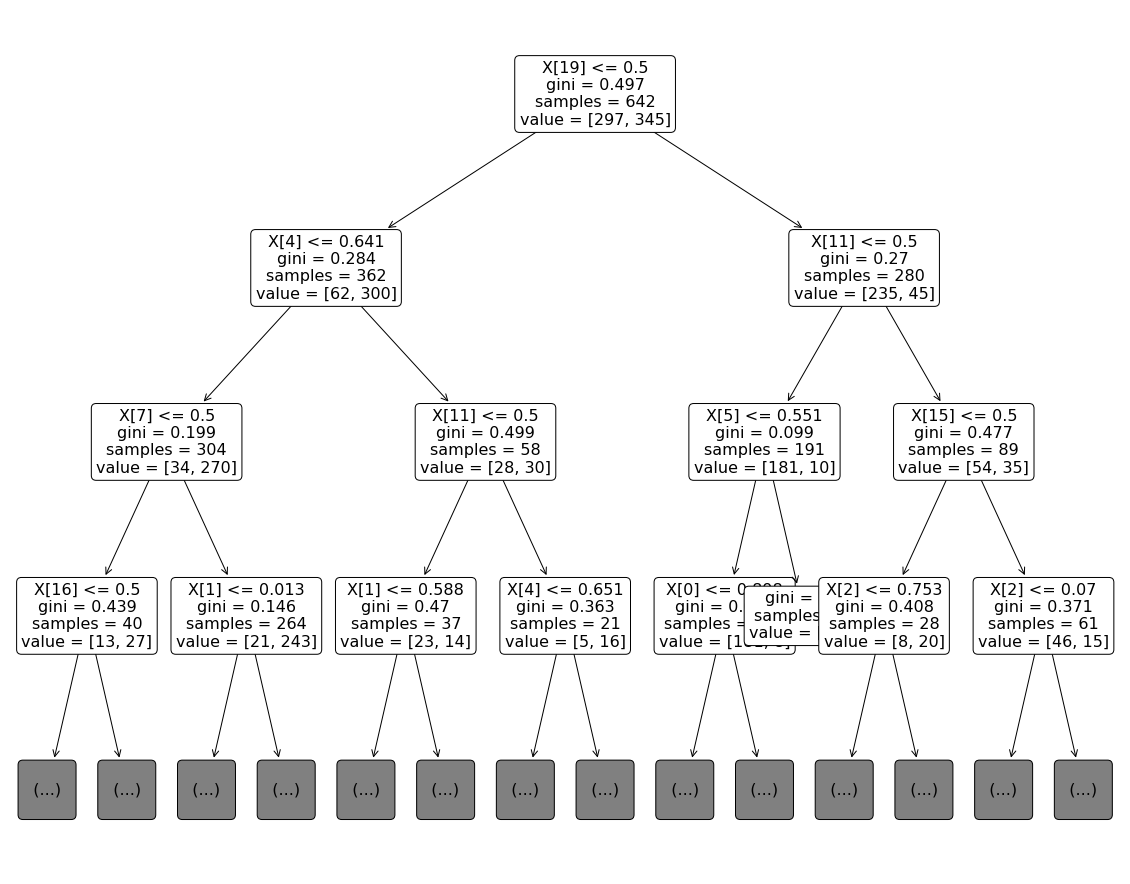

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,16))
tree.plot_tree(clf_model,max_depth = 3, fontsize=16, rounded=True)

**Bagging Using Decision Tree Classifier**

In [ ]:
DT = DecisionTreeClassifier(criterion="entropy",splitter="random", max_depth=4, random_state =42)
model1 = BaggingClassifier(base_estimator=DT)
model1.fit(x_train,y_train)
predictor1 =model1.predict(x_test)
print(predictor1[:5])

[1 1 1 1 0]


In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, predictor1))

Accuracy Score:  0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


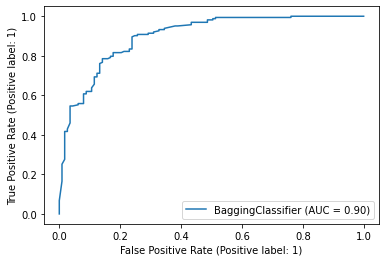

In [ ]:
plot_roc_curve(model1, x_test,y_test)

* The accuracy score of the model using SVM and bagging model is 81% and 82% respectively. But the AUC score of Decision Tree classifier when used with Bagging is higher than that of SVM. Thus, we can say that this model is really good in distinguishing the classes between Heart Diseased and Non Heart Diseased than SVM

* Decision Trees are sensitive to the training data on which they been trained upon. If the training data is changed, resulting decision tree can be quite different and in turn the predictions can be  different. Therefore it is more suitable to use Bagging in such cases where it reduces the variance and overfitting. Thus, the accuracy in the bagged model of the Decision Tree is higher.